- PostgreSQL의 메모리 아키텍처는 크게 두 가지 범주로 분류

**로컬 메모리 영역**
- 각 백엔드 프로세스가 자체 사용을 위해 할당.

**공유 메모리 영역**
- PostgreSQL 서버의 모든 프로세스에서 사용.

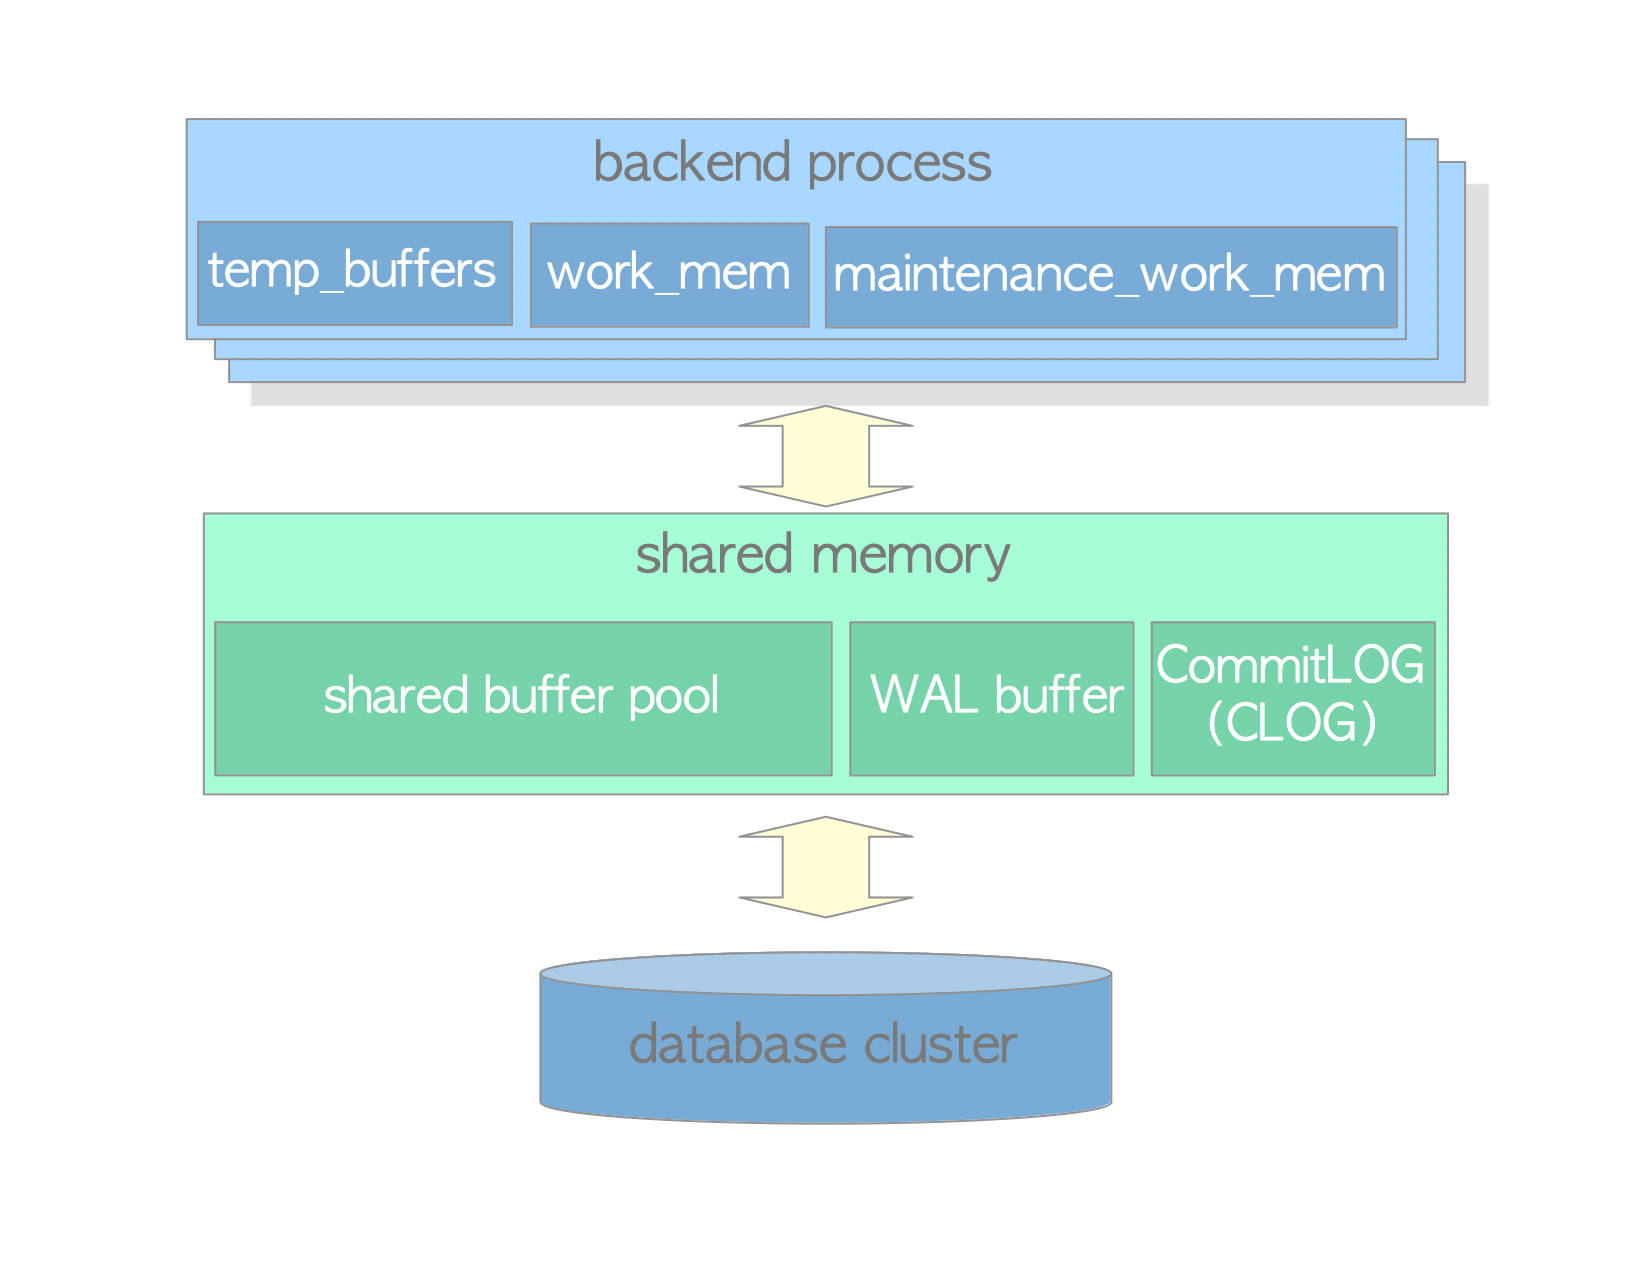

# **로컬 메모리 영역**
- 각 백엔드 프로세스는 쿼리 처리를 위해 로컬 메모리 영역을 할당.
- 영역은 크기가 고정되거나 가변적인 여러 하위 영역으로 나뉨.


**로컬 메모리 영역**

|하위 지역|	설명|
|--|--|
|work_mem|	실행기는 ORDER BY 및 DISTINCT 작업으로 튜플을 정렬하고 병합 조인 및 해시 조인 작업으로 테이블을 조인하는 데 이 영역을 사용.|
|Maintenance_work_mem|	일부 종류의 유지 관리 작업(예: VACUUM, REINDEX)에서는 이 영역을 사용.|
|temp_buffers|	실행자는 임시 테이블을 저장하기 위해 이 영역을 사용.|

# **공유 메모리 영역**

- 공유 메모리 영역은 PostgreSQL 서버가 시작될 때 할당.
-  이 영역은 또한 여러 개의 고정된 크기의 하위 영역으로 나뉨.

**공유 메모리 영역**

|하위 지역|	설명|
|--|--|
|shared buffer pool| 풀	PostgreSQL은 영구 저장소의 테이블과 인덱스 내의 페이지를 이 영역으로 로드하여 직접 운영.|
|WAL buffer|	서버 오류로 인해 데이터가 손실되지 않도록 PostgreSQL은 WAL 메커니즘을 지원. WAL 데이터(XLOG 레코드라고도 함)는 PostgreSQL의 트랜잭션 로그. WAL 버퍼는 영구 저장소에 쓰기 전 WAL 데이터를 버퍼링하는 영역.
|commit log|	커밋 로그(CLOG)는 동시성 제어(CC) 메커니즘을 위해 모든 트랜잭션의 상태(예: in_progress, 커밋, 중단됨)를 유지.|

**공유 버퍼 풀, WAL 버퍼 및 커밋 로그 외에도 PostgreSQL은 아래와 같이 여러 다른 영역을 할당.**
- 다양한 액세스 제어 메커니즘에 대한 하위 영역. (예: 세마포어, 경량 잠금, 공유 및 독점 잠금 등)
- 체크포인터 및 autovacuum과 같은 다양한 백그라운드 프로세스를 위한 하위 영역.
- 저장점 및 2단계 커밋과 같은 트랜잭션 처리를 위한 하위 영역.